In [3]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from functools import reduce

In [4]:
# %connect_info
# %qtconsole

In [5]:
os.chdir('/Users/cgu3/Documents/Grape-Pi/data/rawdata/yeast')

In [6]:
# with open('../data/yeast/raw/reference/goldstandard1.txt') as f:
#     content = f.read().splitlines()
# content

In [31]:
gs1 = pd.read_csv('goldstandard1.txt', header=None, index_col=False, names=['protein'])
gs2 = pd.read_csv('goldstandard2.txt', header=None, index_col=False, names=['protein'])
gs3 = pd.read_csv('goldstandard3.txt', header=None, index_col=False, names=['protein'])
gs4 = pd.read_csv('goldstandard4.txt', header=None, index_col=False, names=['protein'])
all = pd.read_csv('yeast_all.lst.txt', header=None, index_col=False, names=['protein'])

In [32]:
gs1['detected'] = 1
gs2['detected'] = 1
gs3['detected'] = 1
gs4['detected'] = 1

In [33]:
gs1

,protein,detected
0,Q0250,1
1,YAL003W,1
2,YAL005C,1
3,YAL012W,1
4,YAL015C,1
...,...,...
1998,YPR184W,1
1999,YPR187W,1
2000,YPR189W,1
2001,YPR190C,1


In [34]:
data_frames = [gs1, gs2, gs3, gs4]

In [35]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['protein'], suffixes=('', '_y'),
                                            how='outer'), data_frames).fillna(0)

In [36]:
df_merged

,protein,detected,detected_y,detected_y,detected_y
0,Q0250,1.0,0.0,0.0,0.0
1,YAL003W,1.0,1.0,1.0,1.0
2,YAL005C,1.0,1.0,1.0,1.0
3,YAL012W,1.0,1.0,1.0,0.0
4,YAL015C,1.0,1.0,0.0,0.0
...,...,...,...,...,...
2907,YPL209C,0.0,0.0,0.0,1.0
2908,YPL267W,0.0,0.0,0.0,1.0
2909,YPR008W,0.0,0.0,0.0,1.0
2910,YPR095C,0.0,0.0,0.0,1.0


In [37]:
df_merged.columns = ['protein', 'gs1', 'gs2', 'gs3', 'gs4']

In [38]:
df_merged = df_merged.set_index('protein')

In [39]:
positive_protein = df_merged[df_merged.sum(axis=1) >= 2].index.to_series()

In [40]:
df_merged.sum(axis=1).value_counts()

1.0    1264
2.0     764
3.0     711
4.0     173
Name: count, dtype: int64

In [41]:
protein_with_evidence = df_merged.index.to_series()

In [42]:
all_protein = all.iloc[:, 0]

In [43]:
negative_protein = all_protein[~all_protein.isin(protein_with_evidence)]

In [44]:
positive_protein.to_csv('positive.txt', index=False)
negative_protein.to_csv('negative.txt', index=False)

# For yeast-ORBI dataset

In [45]:
import pandas as pd
dat_yeast_ORBI = pd.read_table('ypd_orbi_self-yp4gte2-or-notyp4_no-tm_score_id.txt', delimiter=' ', header=None,
                         names=['ID', 'ProteinProphet_Score', 'P(K|S)', 'mRNA(M)', 'P(K|M)', 'MSpresso_Score', 'TP_or_TN_in_REFERENCEFILE'])
dat_yeast_ORBI = dat_yeast_ORBI.loc[:, ['ID', 'ProteinProphet_Score', 'mRNA(M)']]
dat_yeast_ORBI.columns = ['protein', 'protein probability', 'mRNA(M)']
# yeast_orbi.to_csv('../data/yeast-LCQ/raw/protein/yeast-LCQ.csv', index=False)

In [46]:
dat_yeast_ORBI['y'] = -1
dat_yeast_ORBI.loc[dat_yeast_ORBI['protein'].isin(list(positive_protein)), 'y'] = 1
dat_yeast_ORBI.loc[dat_yeast_ORBI['protein'].isin(list(negative_protein)), 'y'] = 0

In [47]:
dat_yeast_ORBI['y'].value_counts()

y
0    1776
1    1433
Name: count, dtype: int64

In [48]:
dat_yeast_ORBI.rename(columns={'protein probability': 'protein_probability', 'mRNA(M)': 'mRNA'}, inplace=True)
dat_yeast_ORBI.to_csv('yeast-ORBI.csv', index=False)
dat_yeast_ORBI

,protein,protein_probability,mRNA,y
0,YNR077C,0.00,0.13,0
1,YDR444W,0.96,0.15,0
2,YHR213W,0.00,0.16,0
3,YLR465C,0.00,0.16,0
4,YDR543C,0.00,0.18,0
...,...,...,...,...
3204,YKL152C,1.00,122.05,1
3205,YDL184C,0.00,125.56,0
3206,YLR044C,1.00,138.72,1
3207,YKL060C,1.00,153.36,1


# For yeast-LCQ dataset

In [49]:
import pandas as pd
dat_yeast_LCQ = pd.read_table('ypd_lcq_self_yp4gte2-or-notyp4_no-tm_score_id.txt', delimiter=' ', header=None,
                         names=['ID', 'ProteinProphet_Score', 'P(K|S)', 'mRNA(M)', 'P(K|M)', 'MSpresso_Score', 'TP_or_TN_in_REFERENCEFILE'])
dat_yeast_LCQ = dat_yeast_LCQ.loc[:, ['ID', 'ProteinProphet_Score', 'mRNA(M)']]
dat_yeast_LCQ.columns = ['protein', 'protein probability', 'mRNA(M)']

In [50]:
dat_yeast_LCQ['y'] = -1
dat_yeast_LCQ.loc[dat_yeast_LCQ['protein'].isin(list(positive_protein)), 'y'] = 1
dat_yeast_LCQ.loc[dat_yeast_LCQ['protein'].isin(list(negative_protein)), 'y'] = 0

In [51]:
dat_yeast_LCQ['y'].value_counts()

y
0    1776
1    1433
Name: count, dtype: int64

In [52]:
dat_yeast_LCQ.rename(columns={'protein probability': 'protein_probability', 'mRNA(M)': 'mRNA'}, inplace=True)
dat_yeast_LCQ.to_csv('yeast-LCQ.csv', index=False)
dat_yeast_LCQ

,protein,protein_probability,mRNA,y
0,YNR077C,0.00,0.13,0
1,YDR444W,0.49,0.15,0
2,YHR213W,0.00,0.16,0
3,YLR465C,0.00,0.16,0
4,YDR543C,0.00,0.18,0
...,...,...,...,...
3204,YKL152C,1.00,122.05,1
3205,YDL184C,0.00,125.56,0
3206,YLR044C,1.00,138.72,1
3207,YKL060C,1.00,153.36,1


In [53]:
# fill in missing values if we want the yeast dataset contains all yeast proteins
# protein_MS = pd.merge(protein_MS, proteins, how='left', left_on='protein', right_on='ID')
# protein_MS['mRNA(M)'].fillna(0, inplace=True)
# protein_MS.drop(['ID'], axis=1, inplace=True)
# protein_MS.to_csv('../data/yeast-multi-graph/raw/protein/yeast-LCQ.csv')

# Check protein graph created used by the created dataset

In [106]:
import torch

# x = torch.tensor(merged_data.loc[:, ['protein_probability']].values, dtype=torch.float)
x = torch.tensor(dat_yeast_ORBI.loc[:, ['protein_probability', 'mRNA']].values, dtype=torch.float)
y = torch.tensor(dat_yeast_ORBI.loc[:, ['y']].values, dtype=torch.float)
# ids = merged_data.loc[:, ['protein']].values

In [110]:
from graphgym.custom_graphgym.loader.protein import ProteinDataset
yeast_ORBI_dataset = ProteinDataset("yeast-ORBI", numeric_columns=['protein_probability', 'mRNA'], label_column=None, rebuild=True)

Rebuilding...
Done!


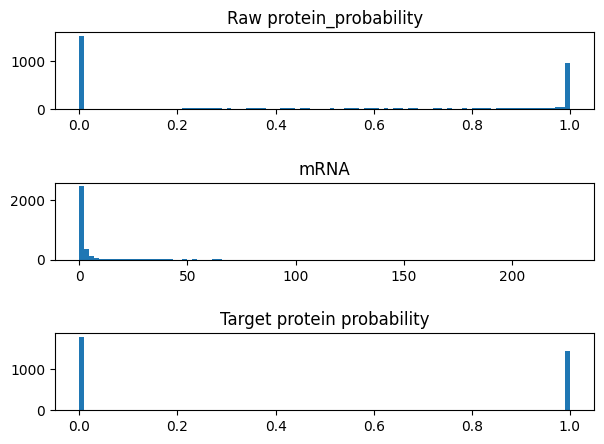

In [111]:
from matplotlib import pyplot as plt

plt.subplot(3, 1, 1)
plt.hist(x[:, 0], bins=100);
plt.title('Raw protein_probability');
# 
plt.subplot(3, 1, 2)
plt.hist(x[:, 1], bins=100);
plt.title('mRNA');

plt.subplot(3, 1, 3)
plt.hist(y.squeeze(-1), bins=100);
plt.title('Target protein probability');

plt.tight_layout(pad=2.0);
plt.show();

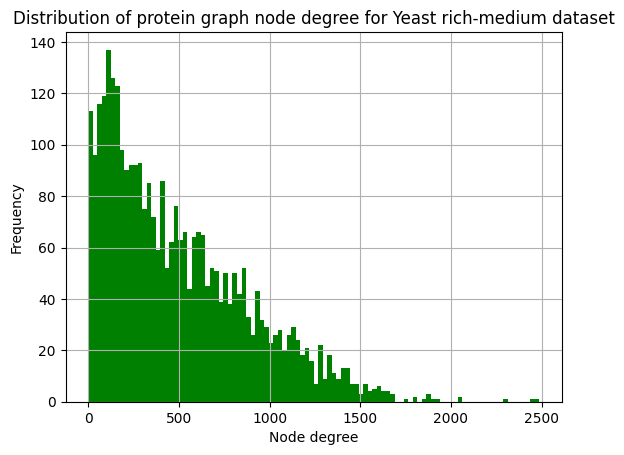

In [116]:
from matplotlib import pyplot as plt
from torch_geometric.utils import  degree
plt.hist(degree(yeast_ORBI_dataset.edge_index[0]), bins=100, color='green')
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Distribution of protein graph node degree for Yeast rich-medium dataset')
plt.grid(True);

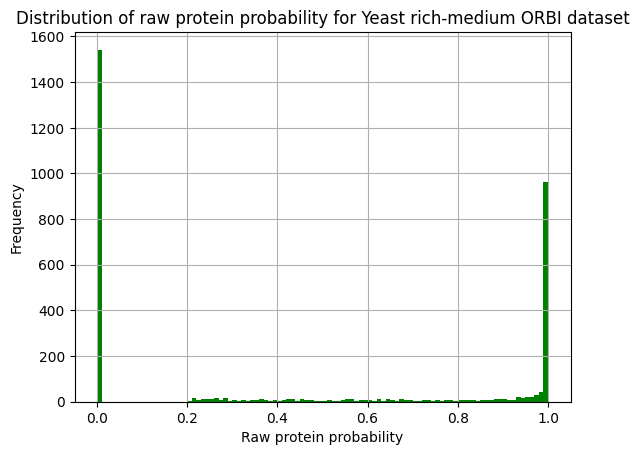

In [117]:
plt.hist(yeast_ORBI_dataset.x[:, 0], bins=100, color='green')
plt.xlabel('Raw protein probability')
plt.ylabel('Frequency')
plt.title('Distribution of raw protein probability for Yeast rich-medium ORBI dataset')
plt.grid(True);# maybe use mean aggregation is better to sample variation